

# Project: Investigate Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Movies is a major field of entertainment for decades now and its popularity and influence increases with every passing year and the expanding materials, cultures and events that can influence a group of people to make a movie. Movies generates huge amount of money and considered to be major jobs and economy generator. In this report I will check the data available about 10,000 movies released from 1960 to 2015 acquiered by kaggle from IMDB and try to find insights on criterias for how movie performance is affected.
A major area to study is the Popularity of a movie and how it's connected to revenues and budgets. Therefore, this is the first question that I will explore. Second is how movies perform in revenue and votes when we put to consider the individuals and genre of the movie.

In [2]:

import pandas as ps
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

<a id='wrangling'></a>
## Data Wrangling
The first stage is Data Wrangling which start by loading target data into the notebook, determining its main properties and checking it out searching for any values that need editing or are missing.

### General Properties

In [3]:
df= ps.read_csv('tmdb-movies.csv', index_col='original_title')
df.head()


,id,imdb_id,popularity,budget,revenue,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
original_title,,,,,,,,,,,,,,,,,,,,
Jurassic World,135397,tt0369610,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
Mad Max: Fury Road,76341,tt1392190,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
Insurgent,262500,tt2908446,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
Star Wars: The Force Awakens,140607,tt2488496,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
Furious 7,168259,tt2820852,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


I used the read_csv to load the data file, then used the
column 'original_title' as an Index for this data since I believe movies are better navigated using their titles.
after that I used 'head()' to load the first 5 rows of data

In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'cast', 'homepage',
       'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

I checked the column names using 'columns' because some of the columns didn't make it in the 'head()' order. I believe there is few columns that can be dropped out and one to be edited for better understanding, that will be the 'runtime' column.

In [5]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10866 entries, Jurassic World to Manos: The Hands of Fate
Data columns (total 20 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float

In [8]:
df.duplicated().sum()

1

In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


After exploring the data there is:
1-Two columns types that need to be converted from int to float.
2-One row that is duplicated.
3-there is great number of rows with values that are equal to zero in the Revenue and Budget columns.
4-Some values in runtime are equal zero.
5-Some null values are present in other non numerical rows.
6-the cast and genres columns have the pipe'|' between names.



### Data Cleaning: 
Next Step is dealing with previously noted problems

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
dupldf=df[df.duplicated()]
print(dupldf)

                   id    imdb_id  popularity    budget  revenue  \
original_title                                                    
TEKKEN          42194  tt0411951     0.59643  30000000   967000   

                                                             cast homepage  \
original_title                                                               
TEKKEN          Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

                        director              tagline  \
original_title                                          
TEKKEN          Dwight H. Little  Survival is no game   

                                                         keywords  \
original_title                                                      
TEKKEN          martial arts|dystopia|based on video game|mart...   

                                                         overview  runtime  \
original_title                                                               
TEKKEN          In the year

I used 'dupldf' to explore which rows are duplicated and it turned out to be the 'Tekken' movie rows

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Now I used the drop_duplicates to remove the duplicatd rows and checked the data again to know if duplicates rows are removed

In [12]:
df.drop(['homepage','tagline', 'keywords', 'overview',], axis=1, inplace=True)
df.head(1)

,id,imdb_id,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
original_title,,,,,,,,,,,,,,,,
Jurassic World,135397,tt0369610,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [13]:
newl = []
for col in df.columns:
    if 'runtime' in col:
        newl.append(col+'_in_minutes')
    else:
        newl.append(col)
newl

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'cast',
 'director',
 'runtime_in_minutes',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [14]:
df.columns=newl

I had to rename the 'runtime' column to 'runtime in minutes' to make the values more clear.

In [15]:
df.production_companies.fillna('Company name is not available', inplace=True)
df.imdb_id.fillna('IMDB ID is not assigned', inplace=True)
df.cast.fillna('Cast names are not available', inplace=True)
df.director.fillna('Director name is not available', inplace=True)
df.genres.fillna('Genres are not available for this movie', inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, Jurassic World to Manos: The Hands of Fate
Data columns (total 16 columns):
id                      10865 non-null int64
imdb_id                 10865 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
cast                    10865 non-null object
director                10865 non-null object
runtime_in_minutes      10865 non-null int64
genres                  10865 non-null object
production_companies    10865 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.4+ MB


Here I used 'fillna' to fill columns with non values using appropriate words since all of them are string columns

In [16]:
df['budget']=df['budget'].astype(float)
df['revenue']=df['revenue'].astype(float)
type(df['budget'][0])
type(df['revenue'][0])


numpy.float64

I changed the data types in both 'budget' and 'revenue' columns from int to float and checked them out using the type function

In [17]:
drop_zero = df[df['budget'] == 0].index 
df.drop(drop_zero , inplace=True)

In [18]:
drop_zero = df[df['revenue'] == 0].index 
df.drop(drop_zero , inplace=True)

In [19]:
drop_zero = df[df['runtime_in_minutes'] == 0].index 
df.drop(drop_zero , inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3703 entries, Jurassic World to Fantastic Voyage
Data columns (total 16 columns):
id                      3703 non-null int64
imdb_id                 3703 non-null object
popularity              3703 non-null float64
budget                  3703 non-null float64
revenue                 3703 non-null float64
cast                    3703 non-null object
director                3703 non-null object
runtime_in_minutes      3703 non-null int64
genres                  3703 non-null object
production_companies    3703 non-null object
release_date            3703 non-null object
vote_count              3703 non-null int64
vote_average            3703 non-null float64
release_year            3703 non-null int64
budget_adj              3703 non-null float64
revenue_adj             3703 non-null float64
dtypes: float64(6), int64(4), object(6)
memory usage: 491.8+ KB


Obviously enough, dropping rows based on three columns with zero values made a great reduction on data to be processed. This was a neccessary evil since huge portion of zero or null values will make data more skewed as said by mentors in udacity. 

<a id='eda'></a>
## Exploratory Data Analysis

Now That I finished cleaning the data let's move to the next step of this report which is working the questions suggested earlier
### The Popularity vs Various Factors that affect it

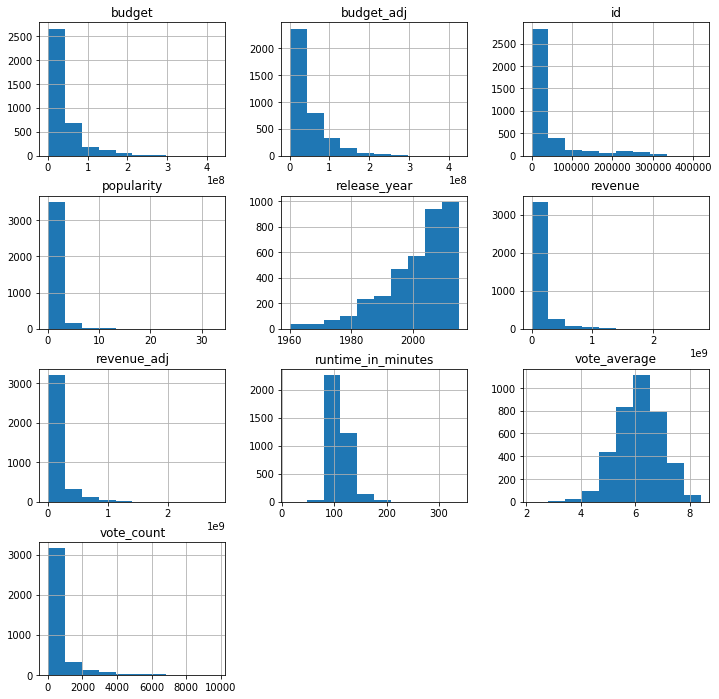

In [21]:
df.hist(figsize=(12,12));

Text(0,0.5,'Popularity')

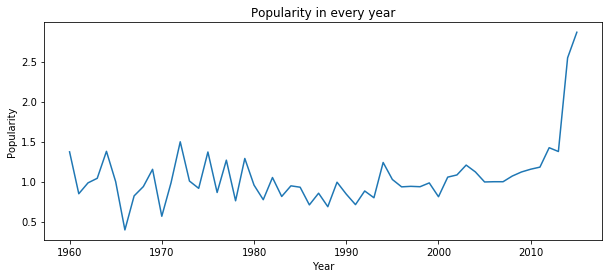

In [22]:
dfpy= df.groupby('release_year')['popularity'].mean()
dfpy.plot(title='Popularity in every year', figsize=(10,4))
#dfpy is df for popularity and release year
plt.xlabel('Year')
plt.ylabel('Popularity')

Text(0.5,1,'Popularity vs Year of Release')

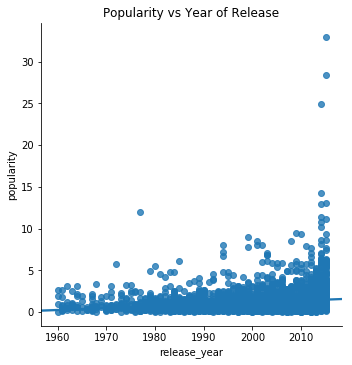

In [46]:
sns.lmplot(x='release_year',y='popularity', data=df,fit_reg=True) 
plt.title('Popularity vs Year of Release')

A fluctuation in popularity kept occuring through the years untill after 2010 where the trend rised to never reached levels. This can be due to general increase in budgets along with other factors

In [22]:
def level(column_name):
    min_value=df[column_name].min()
    first_quantile=df[column_name].quantile(0.25)
    second_quantile=df[column_name].quantile(0.5)
    third_quantile=df[column_name].quantile(0.75)
    max_value=df[column_name].max()
    bin_edges=[min_value, first_quantile, second_quantile, third_quantile, max_value]
    bin_names=['low','medium','mod_high','high']
    return ps.cut(df[column_name], bin_edges, labels=bin_names)                                 


using this function I found on GitHub I can quantile values from budget, revenue, and runtime so it can be compared with popularity

In [23]:
df['budget_level']=level('budget')

Text(0.5,1,'Popularity vs. Budget')

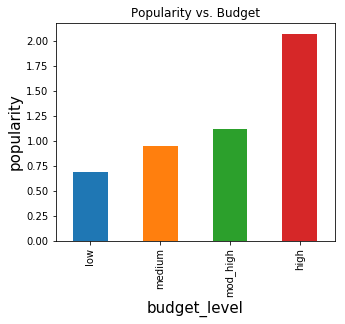

In [24]:
dfpb=df.groupby('budget_level')['popularity'].mean()
dfpb.plot(kind='bar',figsize=(5,4))
#dfpb is df for popularity and budget
plt.xlabel('budget_level',fontsize=15)
plt.ylabel('popularity',fontsize=15)
plt.title('Popularity vs. Budget')

Text(0.5,1,'Popularity vs Budget')

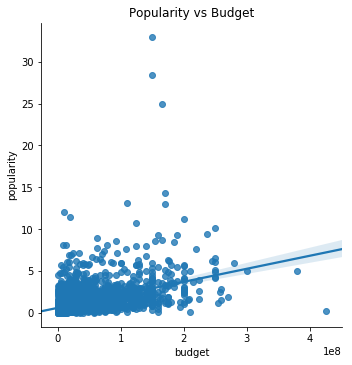

In [47]:
sns.lmplot(x='budget',y='popularity',data=df,fit_reg=True) 
plt.title('Popularity vs Budget')

From these graphs we can assume that budget as a factor has high impact on movies popularity since the movies with higher popularity got higher budgets, this can be due to better marketing, assets, and cast that comes with bigger budgets

In [25]:
df['revenue_level']=level('revenue')

Text(0.5,1,'Popularity vs. Revenue level ')

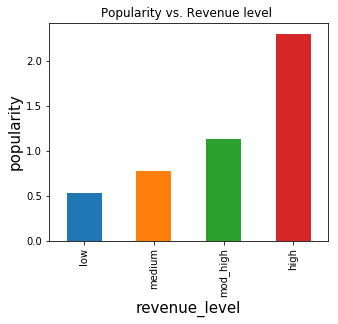

In [26]:
dfpr=df.groupby('revenue_level')['popularity'].mean()
dfpr.plot(kind='bar', figsize=(5,4))
#dfpr is df for popularity vs revenue
plt.xlabel('revenue_level',fontsize=15)
plt.ylabel('popularity',fontsize=15)
plt.title('Popularity vs. Revenue level ')

Here the movie that is more popular obviously accumulated more revenue than movies that are less popular

In [27]:
df['runtime_level']=level('runtime_in_minutes')

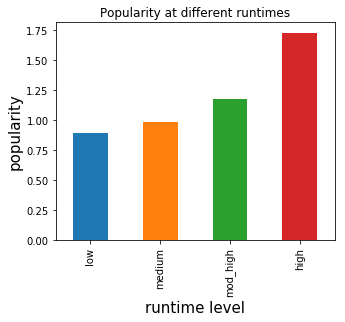

In [28]:
dfprt=df.groupby('runtime_level')['popularity'].mean()
dfprt.plot(kind='bar',figsize=(5,4))
#dfprt is df for popularity vs runtime
plt.xlabel('runtime level',fontsize=15)
plt.ylabel('popularity',fontsize=15)
plt.title('Popularity at different runtimes')
plt.show()

Again the independent variable which is runtime here proportional to the dependent variable the popularity.

### Popular Movie Figurese vs Revenues



This time let's invistigate the relation between major genres, Casts, and directors to generated revenues and voting.

In [29]:
df['genres']=df['genres'].str.split("|",expand=True)
df['genres'].value_counts()

Drama              850
Comedy             768
Action             662
Adventure          302
Horror             258
Crime              165
Thriller           155
Fantasy            104
Animation           99
Science Fiction     96
Romance             62
Family              38
Mystery             33
Documentary         32
Music               28
War                 19
History             17
Western             14
TV Movie             1
Name: genres, dtype: int64

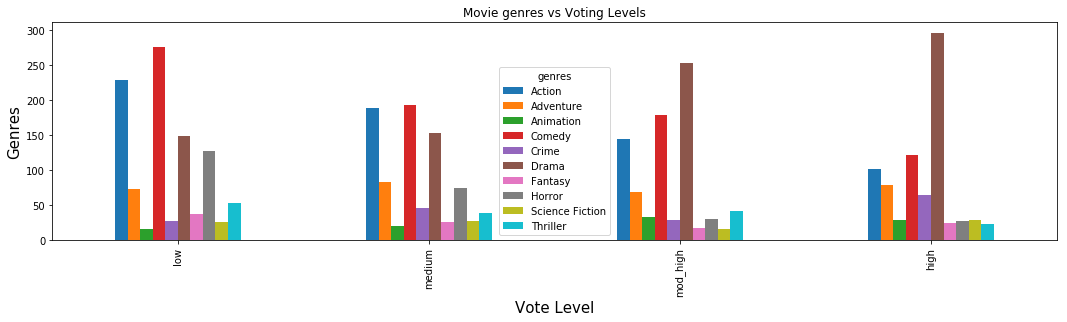

In [30]:
df['vote_level']=level('vote_average')
top_genres=df['genres'].value_counts().head(10).index
df.query('genres in @ top_genres').groupby(['vote_level','genres']).size().unstack(fill_value=0).plot(kind='bar',figsize=(18,4))
plt.xlabel('Vote Level',fontsize=15)
plt.ylabel('Genres',fontsize=15)
plt.title('Movie genres vs Voting Levels')
plt.show()

From this graph based on the 10 highest popular genres we can see that the highesT voted genres are always Action, Comedy, and Drama. while lowest voting varies between Animation, Fantasy, Science Fiction, and Thriller

In [31]:
df['cast']=df['cast'].str.split("|",expand=True)
df['cast'].value_counts()

Nicolas Cage             34
Bruce Willis             32
Johnny Depp              30
Sylvester Stallone       28
Tom Hanks                28
Arnold Schwarzenegger    26
Robert De Niro           26
Denzel Washington        26
Tom Cruise               26
Harrison Ford            23
Jim Carrey               23
Adam Sandler             23
Keanu Reeves             22
Matt Damon               21
Eddie Murphy             21
John Travolta            20
Ben Stiller              20
Robin Williams           19
Kurt Russell             19
Kevin Costner            19
Mark Wahlberg            19
Ben Affleck              18
George Clooney           18
Michael Douglas          18
Clint Eastwood           18
Sandra Bullock           17
Brad Pitt                17
Al Pacino                17
Jean-Claude Van Damme    15
Christian Bale           15
                         ..
James Farentino           1
Jean Dujardin             1
AnnaSophia Robb           1
Odette Annable            1
Kristy Swanson      

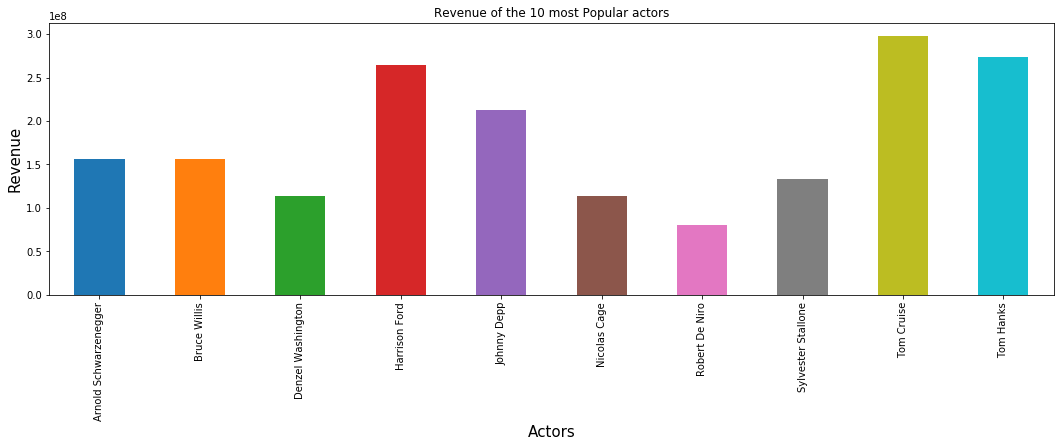

In [32]:
cast=df['cast'].value_counts().head(10).index
dfcr=df.query('cast in @  cast').groupby('cast')['revenue'].mean()
dfcr.plot(kind='bar',figsize=(18,5))
#dfcr is data frame for cast and revenue
plt.xlabel('Actors',fontsize=15)
plt.ylabel('Revenue',fontsize=15)
plt.title('Revenue of the 10 most Popular actors')
plt.show()

In [37]:
df['director'].value_counts().head(10)

Steven Spielberg     27
Clint Eastwood       24
Ridley Scott         20
Woody Allen          18
Steven Soderbergh    16
Martin Scorsese      16
Oliver Stone         15
Renny Harlin         15
Robert Zemeckis      14
Wes Craven           14
Name: director, dtype: int64

despite being the 9th actor in terms of total starred movies Tom Cruis generated the highest accumulative Revenue followed by Tom Hanks and Johnny Depp. Suprisingly the least Revenue belongs to the great Robert De Niro. 

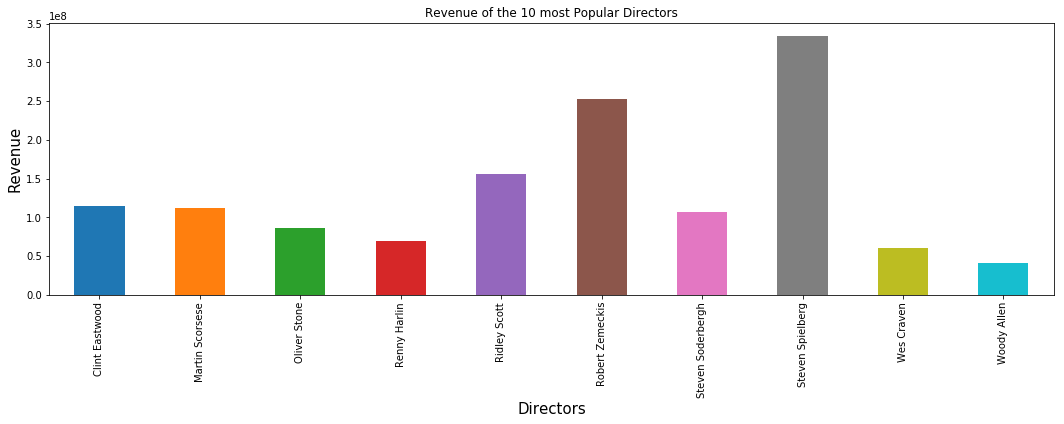

In [33]:
direc=df['director'].value_counts().head(10).index
dfcr=df.query('director in @  direc').groupby('director')['revenue'].mean()
dfcr.plot(kind='bar',figsize=(18,5))
#dfcr is data frame for cast and revenue
plt.xlabel('Directors',fontsize=15)
plt.ylabel('Revenue',fontsize=15)
plt.title('Revenue of the 10 most Popular Directors')
plt.show()

When it comes to directors, the man behind first Jurasic Park is associated with the highest cummulative revenue and Woody Allen scores last in this list.

<a id='conclusions'></a>
## Conclusions

In terms of Popularity there is increase with years despite the ups and downs in most of the decades. Budgets have positive impact on how movies are recieved by the audience. Also it was found that movies that are higher in popularity generates higher revenues. Last factor is the runtime of the movie which is also found to be positive with popularity, apparently people like movies that are longer.
In the next segement we found that the three main genres Drama, Action, and Comedy collect the highest votings. Also Among the most popular actors Tom cruise, Tom Hanks, Johnny Depp have associated with the most revenue collected despite not being the most active among the top 10 actors. Lastly directors like Steven Spielberg, Robert Zemeckis, and Ridley Scott are the top in this case.

Limitations to this analysis for starter is the huge amount of data that had to be dropped due to being null or equals zero. which if would had been left there would result in skewed data but also removing it minimized the movie data to less than the half affecting the insights in a way. Methods to calculate factors like popularity and voting count are not known despite being influencial to this study. 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])